# Table of Contents: 

* **1. Data Exploration:**
   * 1.1 Data Completeness.
   * 1.2 Features Engineering.
* **2. Data Visualization:**
  * 2.1 Features Importance.<br>
  * 2.2 Lat and long plotting against prices.<br>
  * 2.3 The areas of living against prices.<br>
  * 2.4 Grades against prices.<br>
  * 2.5 Grades against other features.<br>
* **3. Modeling:**
  * 3.1 Regression using Multiple Linear Regression.<br>
  * 3.2 Regression using Random Forest.<br>
  * 3.3 Regression using XGBRegressor.<br>
  * 3.4 Models accuracies.

---

## Importing Libraries:

In [680]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

### First, we upload the data and check if there are missing values:

In [681]:
# Upload data
data = pd.read_csv('kc_house_data.csv')

---

# 1. Data Exploration:

## 1.1 Data Completeness:

In [682]:
# Check if there are missing observations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [683]:
# Check some of the observations
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---

## 1.2 Features Engineering:

#### By having a look at the features, i think it would be better to:

1- Break down (date) into 3 new columns (year, month & day) and then drop (date & id) columns.<br>
2- Round the number of bathrooms and floors since representing their number as fraction wouldn't make sense.<br>
3- Include all independent features in the analysis.

In [684]:
# 1- Break down (date) into (year, month & day)
data['year'] = data['date'].apply(lambda x: x[:4]).astype(int)
data['month'] = data['date'].apply(lambda x: x[4:6]).astype(int)
data['day'] = data['date'].apply(lambda x: x[6:8]).astype(int)

# Dropp (id and date)
data.drop(['id', 'date'], axis=1, inplace=True)


# 2- Round the number of bathrooms
data['bathrooms'] = data['bathrooms'].apply(lambda x: round(x, 0))
data['bathrooms'] = data['bathrooms'].astype(int)

# Round the number of floors
data['floors'] = data['floors'].apply(lambda x: round(x, 0))
data['floors'] = data['floors'].astype(int)


# 3- Create X & y (independent and dependent variables) vectors to be used in charts and models
X = data.drop("price",axis=1).values
y = data["price"].values

---

# 2. Data Visualization:

## 2.1 Features Importance:

#### Now, it's time to check how important each feature in the prediction process of the prices using two different algorithms (Random Forest and XGB Regressor):

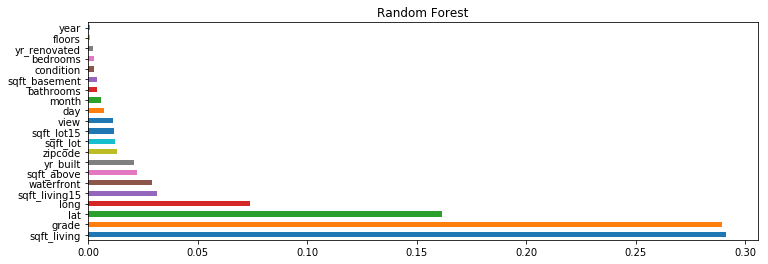

Prices prediction accuracy using this model is:  85.25
The highest 5 features in terms of importance represent 84.78 percent




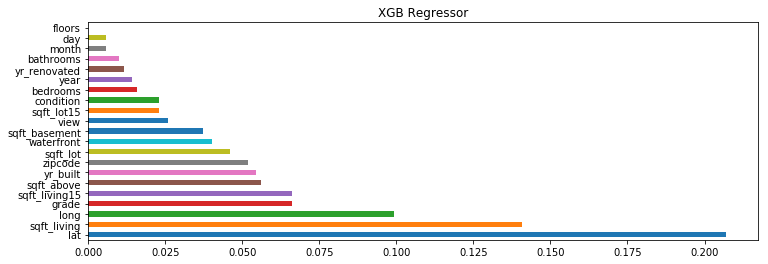

Prices prediction accuracy using this model is:  86.31
The highest 5 features in terms of importance represent 57.90 percent




In [685]:
# Create a list with the algorithms that will be used to check features importance
combine = [RandomForestRegressor(random_state=5), XGBRegressor(random_state=5)]

# Make a list of features' names to label the importance bars with it
columns = data.drop("price",axis=1).columns

# Plot features importance charts when using Random Forest and XGBRegressor algorithms
for classifier in combine:
    classifier.fit(X, y)
    f, axes = plt.subplots(1, 1, figsize=(12, 4))
    (pd.Series(classifier.feature_importances_, index=columns)
       .nlargest(len(classifier.feature_importances_))
       .plot(kind='barh'))
    if classifier == combine[0]:
        plt.title('Random Forest')
    else:
        plt.title('XGB Regressor')
    plt.show()
    accuracy = cross_val_score(estimator = classifier, X = X, y = y, cv = 10, n_jobs = -1)
    print('Prices prediction accuracy using this model is: ', str(round((accuracy.mean() * 100), 2)))
    print('The highest 5 features in terms of importance represent %.2f percent\n\n' % (pd.Series(classifier.feature_importances_, index=columns).sort_values(ascending=False)[0:5].sum() * 100))

#### If we check the above charts, we will see that Random Forest Regressor expects that the highest 5 features in term of importance will contribute with around 85% in predicting prices. While according to XGBRegressor, their contribution will be around 58%.

#### Based on the above assumption, we will check the top 5 most important features (lat,  long, sqft_living, sqft_living15, grade) and see their relation with prices.

---

## 2.2 Lat and long plotting against prices:

#### Checking the relationship between geographical locations and prices: 

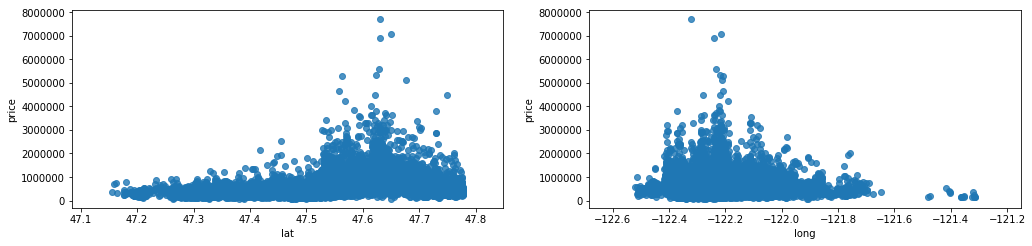

In [686]:
# Set chart size
plt.figure(figsize = (17,8))

# Create scatter plot to check the relationship between (lat & price)
ax1 = plt.subplot(221)
ax1 = sns.regplot('lat', 'price', data=data, fit_reg=False, ax=ax1)

# Create scatter plot to check the relationship between (long & price)
ax2 = plt.subplot(222)
ax2 = sns.regplot('long', 'price', data=data, fit_reg=False, ax=ax2)
plt.show()

#### According to the above plots, we can notice that the most expensive houses are in the north west (lat: 47.63, long: -122.2). Prices start to decrease by heading south and east.

---

## 2.3 The areas of living against prices:

#### Checking the relationship between living areas and prices: 

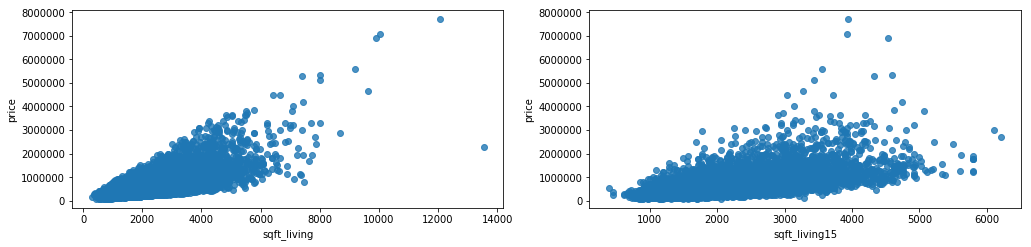

In [687]:
# Set chart size
plt.figure(figsize = (17,8))

# Create scatter plot to check the relationship between (sqft_living & price)
ax1 = plt.subplot(221)
ax1 = sns.regplot('sqft_living', 'price', data=data, fit_reg=False, ax=ax1)

# Create scatter plot to check the relationship between (sqft_living15 & price)
ax2 = plt.subplot(222)
ax2 = sns.regplot('sqft_living15', 'price', data=data, fit_reg=False, ax=ax2)
plt.show()

#### We also can see that living area matters in determining the price.

---

## 2.4 Grades against prices:

#### Checking the relationship between grades and prices: 

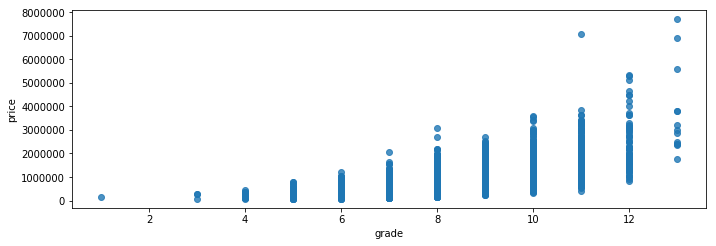

In [688]:
# Set chart size
plt.figure(figsize = (25,8))

# Create scatter plot to check the relationship between (grade & price)
ax1 = plt.subplot(221)
ax1 = sns.regplot('grade', 'price', data=data, fit_reg=False, ax=ax1)
plt.show()

#### A positive correlation is illustrated indicating that prices increase with higher grades. What about the relashipship between grades and other features? In other words, to what extent other features determine the grade?

---

## 2.5 Grades against other features:

In [689]:
# Create a new dataframe
copy_data = data.copy()

# Group 'yr_built' values
for number in range(1890, 2021, 10):
    copy_data.loc[(copy_data['yr_built'] > number) & (copy_data['yr_built'] <= (number + 10)), 'yr_built'] = number + 10

# Group 'yr_renovated' values
for number in range(1890, 2021, 10):
    copy_data.loc[(copy_data['yr_renovated'] > number) & (copy_data['yr_renovated'] <= (number + 10)), 'yr_renovated'] = number + 10

# Group 'sqft_lot' values
for number in range(0, 1700001, 100000):
    copy_data.loc[(copy_data['sqft_lot'] > number) & (copy_data['sqft_lot'] <= (number + 100000)), 'sqft_lot'] = number + 100000
    
# Group 'sqft_basement' values
for number in range(0, 5001, 500):
    copy_data.loc[(copy_data['sqft_basement'] > number) & (copy_data['sqft_basement'] <= (number + 500)), 'sqft_basement'] = number + 500
    
# Group 'sqft_above' values
for number in range(0, 10001, 1000):
    copy_data.loc[(copy_data['sqft_above'] > number) & (copy_data['sqft_above'] <= (number + 1000)), 'sqft_above'] = number + 1000

# Create a list of all features that we will checked against grade
parameters = ['yr_built', 'yr_renovated', 'sqft_lot', 'sqft_basement', 'sqft_above', 'floors', 'month', 'bedrooms', 
            'condition', 'waterfront', 'view', 'grade']
cm = sns.light_palette("green", as_cmap=True)

# Display a table for each feature against grade
for number in range(0, len(parameters) - 1):
    display(pd.crosstab(copy_data[parameters[number]], copy_data[parameters[len(parameters) - 1]]).style.background_gradient(cmap = cm))

grade,1,3,4,5,6,7,8,9,10,11,12,13
yr_built,,,,,,,,,,,,
1900,0,0,1,6,23,39,11,5,2,0,0,0
1910,0,0,0,23,146,317,132,47,17,6,3,1
1920,0,1,5,30,217,361,121,23,8,4,0,0
1930,0,0,2,32,211,634,192,83,22,6,1,1
1940,0,0,5,34,144,239,114,30,22,6,1,1
1950,0,1,12,78,661,869,189,36,10,1,1,0
1960,0,0,2,26,306,1492,482,113,25,4,0,0
1970,1,1,1,5,173,1541,644,128,46,3,0,1
1980,0,0,0,1,69,1071,911,241,82,15,2,1


grade,1,3,4,5,6,7,8,9,10,11,12,13
yr_renovated,,,,,,,,,,,,
0,1,3,28,236,1941,8645,5803,2477,1084,384,87,10
1940,0,0,0,0,2,1,0,0,0,0,0,0
1950,0,0,0,0,5,4,0,0,0,0,0,0
1960,0,0,0,1,9,12,1,1,0,0,0,0
1970,0,0,0,0,7,26,4,2,0,0,0,0
1980,0,0,1,0,8,32,13,1,1,2,0,0
1990,0,0,0,2,20,71,52,11,6,1,2,1
2000,0,0,0,2,11,58,64,37,14,6,0,0
2010,0,0,0,0,19,62,78,62,25,6,1,2


grade,1,3,4,5,6,7,8,9,10,11,12,13
sqft_lot,,,,,,,,,,,,
100000,1,3,28,235,2010,8858,5957,2518,1073,370,81,13
200000,0,0,0,2,14,57,49,39,31,12,3,0
300000,0,0,1,2,10,48,48,43,21,11,4,0
400000,0,0,0,1,1,8,6,6,3,2,1,0
500000,0,0,0,0,2,6,4,6,3,1,0,0
600000,0,0,0,1,0,3,1,1,1,0,0,0
700000,0,0,0,0,0,0,1,1,0,0,0,0
800000,0,0,0,0,0,0,0,1,0,0,0,0
900000,0,0,0,0,0,1,0,0,0,3,0,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
sqft_basement,,,,,,,,,,,,
0,1,3,28,224,1568,5174,3451,1710,693,226,45,3
500,0,0,1,8,237,1341,843,173,58,10,2,0
1000,0,0,0,10,208,1919,1171,411,164,53,10,2
1500,0,0,0,0,25,529,514,231,140,58,12,3
2000,0,0,0,0,0,17,84,69,63,35,8,1
2500,0,0,0,0,0,1,5,19,14,12,8,0
3000,0,0,0,0,0,0,0,2,2,4,2,3
3500,0,0,0,0,0,0,0,0,0,1,1,1
4500,0,0,0,0,0,0,0,0,0,0,1,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
sqft_above,,,,,,,,,,,,
1000,1,3,28,162,1017,1236,131,14,2,0,0,0
2000,0,0,1,79,987,6920,3726,522,69,5,0,0
3000,0,0,0,1,33,752,1994,1438,423,57,7,0
4000,0,0,0,0,1,69,210,612,516,166,19,0
5000,0,0,0,0,0,4,6,28,114,132,37,5
6000,0,0,0,0,0,0,1,1,10,31,13,1
7000,0,0,0,0,0,0,0,0,0,5,11,4
8000,0,0,0,0,0,0,0,0,0,2,2,1
9000,0,0,0,0,0,0,0,0,0,1,0,2


grade,1,3,4,5,6,7,8,9,10,11,12,13
floors,,,,,,,,,,,,
1,1,3,27,202,1662,5916,2233,447,142,34,11,2
2,0,0,2,40,376,2964,3444,2086,967,348,74,11
3,0,0,0,0,0,100,385,82,25,17,4,0
4,0,0,0,0,0,1,6,0,0,0,1,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
month,,,,,,,,,,,,
1,0,0,1,16,91,410,274,116,45,13,11,1
2,0,2,1,15,138,547,340,124,54,23,6,0
3,0,0,3,19,208,810,476,235,89,31,3,1
4,0,0,4,28,205,909,667,256,109,46,6,1
5,0,0,2,31,223,1019,635,301,144,45,14,0
6,0,0,3,17,185,872,629,276,145,44,8,1
7,0,0,3,20,184,882,653,301,118,42,7,1
8,0,0,2,13,200,769,581,212,109,41,12,1
9,1,0,0,22,167,740,496,234,80,24,7,3


grade,1,3,4,5,6,7,8,9,10,11,12,13
bedrooms,,,,,,,,,,,,
0,1,0,2,0,0,6,3,0,0,0,1,0
1,0,3,12,37,78,52,14,2,1,0,0,0
2,0,0,14,114,824,1205,499,78,21,3,2,0
3,0,0,1,62,854,4917,2796,832,296,56,9,1
4,0,0,0,21,233,2177,2194,1351,615,239,49,3
5,0,0,0,5,41,501,455,313,173,83,24,6
6,0,0,0,3,7,98,90,33,22,13,3,3
7,0,0,0,0,1,11,12,4,5,4,1,0
8,0,0,0,0,0,6,4,1,1,0,1,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0
2,0,1,5,15,59,75,13,2,2,0,0,0
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11
4,0,0,10,84,685,2833,1394,446,156,56,13,2
5,0,1,0,34,248,833,390,126,55,11,3,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
waterfront,,,,,,,,,,,,
0,1,3,29,238,2026,8958,6028,2590,1106,379,79,13
1,0,0,0,4,12,23,40,25,28,20,11,0


grade,1,3,4,5,6,7,8,9,10,11,12,13
view,,,,,,,,,,,,
0,1,3,26,229,1955,8556,5412,2160,857,242,43,5
1,0,0,2,2,15,94,110,63,26,18,2,0
2,0,0,1,6,42,222,326,189,102,59,13,3
3,0,0,0,1,14,78,146,130,84,45,10,2
4,0,0,0,4,12,31,74,73,65,35,22,3


#### From the above cross tables, we can see how each grouped values related to each feature can affect the determination of grades. Another way to see these correlations is to check the corresponding correlation coefficient below:

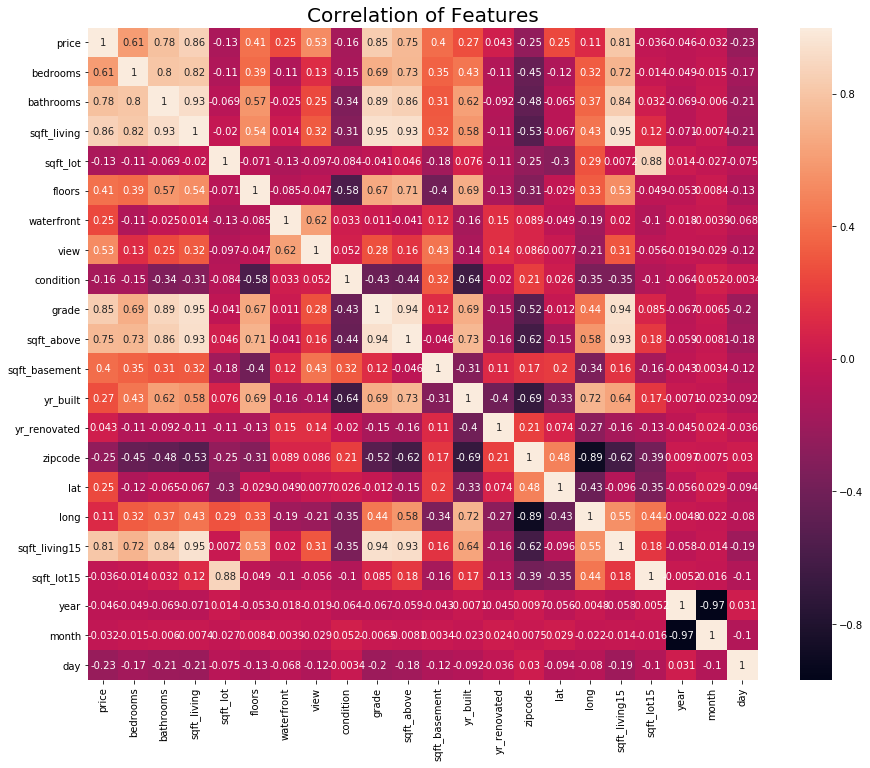

In [690]:
plt.figure(figsize=(15,12))
plt.title('Correlation of Features', fontsize=20)
sns.heatmap(copy_data.corr().astype(float).corr(),vmax=1.0, annot=True)
plt.show()

---

# 3. Modeling:

#### At this stage, it's time to see which algorithm will predict the prices with highest accuracy rate. Starting off by creating a function to check the best hyperparameters for each model:

In [691]:
# Create function to check the best hyperparameters for each model
def params_checker (algo, parameters, x, y):
    grid_search = GridSearchCV(estimator = algo, param_grid = parameters, scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1)
    grid_search = grid_search.fit(x, y)
    
    # Print the mean absolute error for best parameters reached
    print("- mean absolute error: %.2f" % ((round(grid_search.best_score_, 2))))

#### Create a dataframe that holds the predictions' accuracies obtained from each model:

In [692]:
# Create a dataframe that will hold each model's prediction accuracy calculated using cross validation.
accuracy_dataframe = pd.DataFrame(columns=['Model', 'CV_Score'])

---

## 3.1 Multiple Linear Regression:

#### Check the significance of each feature "(P) value":

In [693]:
# Aggregate all independent features and add a column of ones at the beginning (since statsmodels 'sm' library doesn't take in consideration the constant coefficient (b0) at the multiple linear regression equation)
X_multi = np.append(arr = np.ones((len(data), 1)).astype(int), values = X, axis = 1)

# Create an object with the significant features (after performing backward elimination, i removed feature number 20 "month" since it had a (P) value above 5% "its (P) value was 12.8%")
X_opt = X_multi [:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21]]

# Fitting the data and checking the R-squared
classifier_OLS = sm.OLS(endog = y, exog = X_opt).fit()
classifier_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2681.
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:17:40   Log-Likelihood:            -2.9451e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21593   BIC:                         5.892e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.366e+07   6.58e+06     -8.157      0.000   -6.66e+07   -4.08e+07
x1         -3.622e+04   1873.865    -19.327      0.000   -3.99e+04   -3.25e+04
x2          4.319e+04   2729.174     15.826      0.000    3.78e+04    4.85e+04
x3           109.5383      2.211     49.554      0.000     105.206     113.871
x4             0.1178      0.048      2.469      0.014       0.024       0.211
x5          7605.5490   3147.030      2.417      0.016    1437.138    1.38e+04
x6          5.856e+05   1.73e+04     33.872      0.000    5.52e+05    6.19e+05
x7          5.207e+04   2131.991     24.422      0.000    4.79e+04    5.62e+04
x8          2.716e+04   2343.776     11.589      0.000    2.26e+04    3.18e+04
x9            9.6e+04   2141.152     44.835      0.000    9.18e+04       1e+05
x10           71.7508      2.235     32.102      0.000      67.370      76.132
x11           37.7839      2.597     14.551      0.000      32.694      42.873
x12        -2508.3740     68.018    -36.878      0.000   -2641.694   -2375.054
x13           21.3524      3.625      5.890      0.000      14.247      28.458
x14         -585.7806     32.839    -17.838      0.000    -650.147    -521.414
x15         6.028e+05   1.07e+04     56.368      0.000    5.82e+05    6.24e+05
x16        -2.118e+05   1.31e+04    -16.197      0.000   -2.37e+05   -1.86e+05
x17           23.7226      3.441      6.895      0.000      16.979      30.467
x18           -0.3949      0.073     -5.415      0.000      -0.538      -0.252
x19         3.019e+04   2923.435     10.328      0.000    2.45e+04    3.59e+04
x20         -368.0215    157.949     -2.330      0.020    -677.613     -58.430
==============================================================================
Omnibus:                    18381.106   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1897014.278
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      48.341   Cond. No.                     4.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check the best hyperparameters and its prediction accuracy:

In [694]:
# Create parameters dictionary to use it with the 'params_checker' function
params = dict(normalize = [False])

# Use grid search through 'params_checker' function and specify the algorithm, parameters, x & y to get the best parameters that generate the highest prediction accuracy
params_checker(LinearRegression(), params, X, y)

# Create object without 'month' feature (since it's not a significant feature according to it's (P) value)
X_opt = data.drop([data.columns[0], data.columns[len(data.columns)-2]], axis=1).values

# Calculate the accuracy of the model using 10 fold cross validation
accuracies = cross_val_score(estimator = LinearRegression(), X = X_opt, y = y, cv = 10, n_jobs = -1)
print('- Accuracy using 10 folds is:', round((accuracies.mean()) * 100, 3), '%')

# Add the name of the model and the accuracy result to accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'Multiple Linear', (str(round((accuracies.mean()) * 100, 3)) + ' %')

- mean absolute error: -126312.36
- Accuracy using 10 folds is: 69.793 %


#### We can see that the values of R-squared and accuracy obtained from performing cross validatoin are almost the same (70%) which indicates that, according to multiple linear regression, the independent features can explain almost 70% of the changes in prices.

---

## 3.2 Random Forest:

#### Check the best hyperparameters and its corresponding prediction accuracy:

In [695]:
# Create parameters dictionary to use it with the 'params_checker' function
params = dict(n_estimators=[165], min_samples_split=[3], random_state=[0])

# Use grid search through 'params_checker' function and specify the algorithm, parameters, x & y to get the best parameters that generate the highest prediction accuracy
params_checker(RandomForestRegressor(), params, X, y)

# Create object with the best parameters to use it in the cross validation
algo = RandomForestRegressor(n_estimators=165, min_samples_split=3, random_state=0)

# Calculate the accuracy of the model using 10 fold cross validation
accuracies = cross_val_score(estimator = algo, X = X, y = y, cv = 10, n_jobs = -1)
print('- Accuracy using 10 folds is:', round((accuracies.mean()) * 100, 3), '%')

# Add the name of the model and the accuracy result to accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'Random Forest', (str(round((accuracies.mean()) * 100, 3)) + ' %')

- mean absolute error: -69178.20
- Accuracy using 10 folds is: 87.731 %


---

## 3.3 XGBRegressor:

#### Check the best hyperparameters and its corresponding prediction accuracy:

In [698]:
# Create parameters dictionary to use it with the 'params_checker' function
params = dict(max_depth=[7], learning_rate=[0.1], n_estimators=[350], gamma=[0.00001], min_child_weight=[3], colsample_bytree=[0.7])

# Use grid search through 'params_checker' function and specify the algorithm, parameters, x & y to get the best parameters that generate the highest prediction accuracy
params_checker(XGBRegressor(), params, X, y)

# Create object with the best parameters to use it in the cross validation
algo = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=350, gamma=0.00001, min_child_weight=3, colsample_bytree=0.7)

# Calculate the accuracy of the model using 10 fold cross validation
accuracies = cross_val_score(estimator = algo, X = X, y = y, cv = 10, n_jobs = -1)
print('- Accuracy using 10 folds is:', round((accuracies.mean()) * 100, 3), '%')

# Add the name of the model and the accuracy result to accuracy_dataframe
accuracy_dataframe.loc[len(accuracy_dataframe)] = 'XGBRegressor', (str(round((accuracies.mean()) * 100, 3)) + ' %')

- mean absolute error: -62740.92
- Accuracy using 10 folds is: 90.028 %


---

## 3.4 Models accuracies

#### Now, let's have a look on the scores for each model ranked from highest to lowest:

In [697]:
accuracy_dataframe = accuracy_dataframe.sort_values(['CV_Score'], ascending=False)
accuracy_dataframe.reset_index(drop=True)

,Model,CV_Score
0,XGBRegressor,90.028 %
1,Random Forest,87.731 %
2,Multiple Linear,69.793 %


#### According to the above results, XGBRegressor model has the best price prediction accuracy.